In [2]:
'''
- 여러개의 Decision Tree(의사결정나무)를 묶어서 하나의 모델로 사용
- 학습 및 테스트 순서
  1. 데이터 생성
  2. 전처리
  3. 학습 및 테스트 데이터 생성
  4. 학습모델 생성
  5. 모델 예측(테스트)
  6. 정확도 산출(평가)
  
- 사용 데이터 : 타이타닉 생존율 분석
- 독립변수 : 연속형 데이터 (Pclass , age_sex(성별))
- 종속변수 : 범주형 데이터 (Survived(생존여부))
'''

'\n- 여러개의 Decision Tree(의사결정나무)를 묶어서 하나의 모델로 사용\n- 학습 및 테스트 순서\n  1. 데이터 생성\n  2. 전처리\n  3. 학습 및 테스트 데이터 생성\n  4. 학습모델 생성\n  5. 모델 예측(테스트)\n  6. 정확도 산출(평가)\n  \n- 사용 데이터 : 타이타닉 생존율 분석\n- 독립변수 : 연속형 데이터 (Pclass , age_sex(성별))\n- 종속변수 : 범주형 데이터 (Survived(생존여부))\n'

In [5]:
### 라이브러리 불러들이기
# 모델 라이브러리
from sklearn.ensemble import RandomForestClassifier
# 학습 및 테스트 데이터 추출을 위한 라이브러리
from sklearn.model_selection import train_test_split

import pandas as pd
#모델 선택 알고리즘
from sklearn import model_selection
#평가 라이브러리
from sklearn.metrics._scorer import accuracy_scorer

In [9]:
### 데이터 생성하기
file = "https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/titanic_data.csv"
df = pd.read_csv(file)
df
### 결측치 확인하기
# 전체 행의 갯수 대비 결측치가 있는 컬럼 확인
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
### 결측치 처리하기
# 사용할 독립변수를 기준으로 결측치가 있는 모든 행들 삭제하기
df = df.dropna(subset=['Pclass','Age','Sex'])
# 행렬의 차원으로 데이터 형태 조회
print(df.shape)

(714, 12)


In [13]:
# 사용할 독립변수 추출하기
# 보통 분석 시에는 숫자값으로 바꿔줍니다
# 남/여 = > 0/1로
# pclass : 등급별로 완핫인코딩
df_x = df[['Pclass','Age','Sex']]
df_x.head(3)

,Pclass,Age,Sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [15]:
### 성별 데이터를 정수값 0과 1로 변환하기
df_x.loc[: ,"Sex"] = LabelEncoder().fit_transform(df_x["Sex"])
print(df_x)

     Pclass   Age  Sex
0         3  22.0    1
1         1  38.0    0
2         3  26.0    0
3         1  35.0    0
4         3  35.0    1
..      ...   ...  ...
885       3  39.0    0
886       2  27.0    1
887       1  19.0    0
889       1  26.0    1
890       3  32.0    1

[714 rows x 3 columns]


C:\Users\admin\AppData\Local\Temp\ipykernel_8148\1682854390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x.loc[: ,"Sex"] = LabelEncoder().fit_transform(df_x["Sex"])


In [16]:
df_x

,Pclass,Age,Sex
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
885,3,39.0,0
886,2,27.0,1
887,1,19.0,0
889,1,26.0,1


In [22]:
# 원핫인코딩하는이유 정확도가 높아진다 ?
import numpy as np
df_x2 = pd.DataFrame(OneHotEncoder().fit_transform(df_x['Pclass'].values[:,np.newaxis]).toarray(),
                    columns = ["f_class","s_class","t_class"],
                    index = df_x.index)
df_x2

,f_class,s_class,t_class
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
885,0.0,0.0,1.0
886,0.0,1.0,0.0
887,1.0,0.0,0.0
889,1.0,0.0,0.0


In [24]:
### 기존 df_x 데이터프레임에 위에 pclass 데이터프레임을 옆으로 붙이기
df_x = pd.concat([df_x, df_x2], axis=1)
df_x

,Pclass,Age,Sex,f_class,s_class,t_class
0,3,22.0,1,0.0,0.0,1.0
1,1,38.0,0,1.0,0.0,0.0
2,3,26.0,0,0.0,0.0,1.0
3,1,35.0,0,1.0,0.0,0.0
4,3,35.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...
885,3,39.0,0,0.0,0.0,1.0
886,2,27.0,1,0.0,1.0,0.0
887,1,19.0,0,1.0,0.0,0.0
889,1,26.0,1,1.0,0.0,0.0


In [25]:
### 종속변수 추출하기
df_y = df["Survived"]
df_y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [26]:
### train 데이터와 test 데이터 만들기
# 추출 기준 : 테스트(test) 데이터 30%, 학습(train) 데이터 70%
# 디폴트 추출 기준 : 0.25

train_x, test_x, train_y, test_y = train_test_split(df_x,df_y, test_size = 0.3)
print('train_x = ', len(train_x))
print('test_x = ', len(test_x))
print('train_y = ', len(train_y))
print('test_y = ', len(test_y))

train_x =  499
test_x =  215
train_y =  499
test_y =  215


In [30]:
## 학습모델 생성하기
# 모델 객체 생성하기
# n_estimators : 사용할 트리의 갯수 지정
# criterion : 균형잡힌 트리로 분리하기
model = RandomForestClassifier(n_estimators = 500, criterion = "entropy")

# 학습모델 생성하기 ..
fit_model = model.fit(train_x, train_y)

# 한번에 객체생성과 학습모델 생성은 아래와 같이 ... 붙여서 ... 둠
# RandomForestClassifier(n_estimators = 500, criterion = "entropy").model.fit(train_x, train_y)
print(fit_model)

RandomForestClassifier(criterion='entropy', n_estimators=500)


In [31]:
### 모델 테스트(예측)하기...
pred = fit_model.predict(test_x)
print('예측값 = \n', pred)
print('---------------------------')
print('실제값 = \n', test_y.ravel())

예측값 = 
 [1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1]
---------------------------
실제값 = 
 [0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0
 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1]


In [32]:
### 모델 평가하기 : 정확도 확인하기
from sklearn.metrics import accuracy_score

In [33]:
### 계산에 의한 정확도 확인
print('정확도(accuracy_score) = ', sum(test_y == pred) / len(test_y))

### 라이브러리를 이용한 정확도 확인
print('lib 정확도(accuracy_score) = ' , accuracy_score(test_y, pred))

정확도(accuracy_score) =  0.7953488372093023
lib 정확도(accuracy_score) =  0.7953488372093023


### 병렬처리 vs 직렬처리
##### - 병렬처리(RandomForest 모델) vs 직렬처리(Boosting 방식)

In [34]:
### 사용할 라이브러리
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
# pip install xgboost
# 직렬처리 라이브러리
import xgboost as xgb


In [42]:
### 데이터 생성
iris = datasets.load_iris()


### 데이터 프레임 생성
data = pd.DataFrame({
'sepal length' : iris.data[:,0],
'sepal width' : iris.data[:,1],
'petal length' : iris.data[:,2],
'petal width' : iris.data[:,3],
'species' : iris.target
})
data



## 독립변수(x)
x = data[['sepal length','sepal width','petal length','petal width']]

## 종속변수(y)
y = data['species']

In [48]:
### 테스트 데이터 3개, 학습 데이터 70% 분류하기
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [52]:
### 학습모델 생성하기
# 객체 생성
model = RandomForestClassifier(n_estimators = 100)

# 학습모델 생성하기
fit_model = model.fit(x_train, y_train)

print(fit_model)

## 예측하기
y_pred = fit_model.predict(x_test)
print("예측결과 = \n", y_pred)

### 정확도 확인하기
print('정확도 = ' , metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()
예측결과 = 
 [1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0 2 1 0 0 1 1 2
 0 0 1 1 0 2 2 2]
정확도 =  0.9333333333333333


In [58]:
### 학습모델 생성하기
# 객체 생성
#model = RandomForestClassifier(n_estimators = 100)


# 직렬처리 방식
# - booster : 의사결정 기반 모형(gbtree), 선형모델(linear) 둘중 한가지 사용
# - max_depth : 과적합 방지를 위해 사용(default : 6, 보통 3~10 사이 값 사용)
model = xgb.XGBClassifier(booster = 'gbtree', max_depth = 4, n_estimators=101)

# 학습모델 생성하기
fit_model = model.fit(x_train, y_train)

print(fit_model)

## 예측하기
y_pred = fit_model.predict(x_test)
print("예측결과 = \n", y_pred)

### 정확도 확인하기
print('정확도 = ' , metrics.accuracy_score(y_test, y_pred))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=101,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
예측결과 = 
 [1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0 2 1 0 0 1 1 2
 0 0 1 1 0 2 2 2]
정확도 =  0.9333333333333333


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

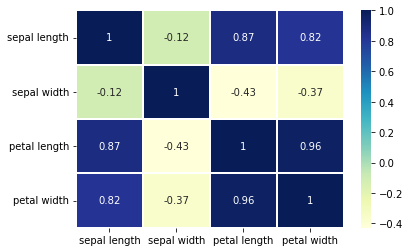

In [62]:
### 상관관계도
data2 = data[['sepal length','sepal width','petal length','petal width']]
### corr() : 상관계수
sns.heatmap(data2.corr(), annot = True, cmap = 'YlGnBu', linewidth = 0.1)
plt.show()

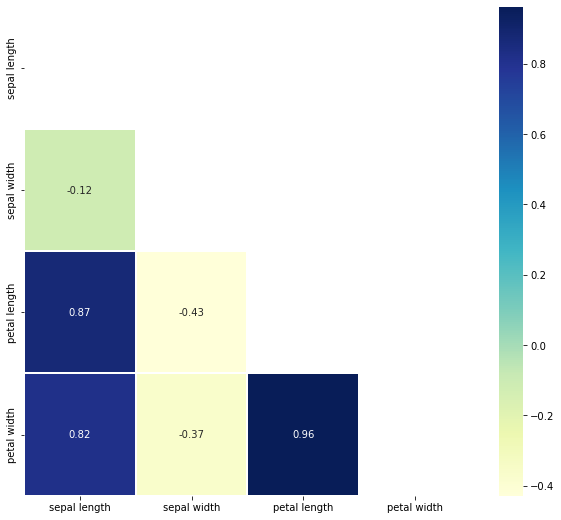

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9))

mask = np.zeros_like(data2.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data2.corr(), annot=True, cmap='YlGnBu', linewidth=0.1, mask=mask)
plt.show()